In [40]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

import pickle

In [41]:
# load filenames for animal images
animal_files = np.array(glob("data/train/*/*"))

# print number of images in each dataset
print('There are %d total animal images.' % len(animal_files))

There are 11807 total animal images.


In [42]:
def load_animals(dataset):
    
    print("Loading {} dataset...".format(dataset))
    cout = []
    names = []
    animals = []
    for dirName, subdirList, fileList in os.walk("data/{}".format(dataset), topdown=False):
        print('Found directory: %s' % dirName)
        rbg_flatten = []
        if dirName[6 + len(dataset):] != "":
            temp = []
            for file in fileList:
                if '.jpg' in file:
                    img = imread(os.path.join(dirName, file))
                    temp.append(img)
            cout.append(len(temp))
            names.append(dirName[6 + len(dataset):])
            animals.append(temp)

    print("Animal with maximum number of pictures: {}, the number of pictures is: {}".format(names[np.argmax(cout[:-1])], max(cout[:-1])))
    print("Animal with minimum number of pictures: {}, the number of pictures is: {}".format(names[np.argmin(cout[:-1])], min(cout[:-1])))
    
    animal = pd.DataFrame(names, columns=['animal'])
    data = pd.DataFrame(cout, columns=[dataset])
    data = pd.concat([animal, data], axis=1)
    
    return animals, data

In [43]:
def visualize_animal(data, dataset):
    plt.figure(figsize = (6, 4))

    plt.bar(data['animal'], data[dataset])

    plt.xticks()

    plt.xlabel('Animal', fontsize = 15)
    plt.ylabel('Image counts', fontsize = 15)
    plt.title('Distribution of images in the {} dataset'.format(dataset), fontsize = 15)

    plt.show()

In [44]:
def transform(animals):

    X = pd.DataFrame()
    y = pd.DataFrame()
    
    for i in range(len(animals)):
        print(i)
        rbg_flatten = []
        for img in animals[i]:
            rbg_flatten.append(resize(img,(30,30,3)).flatten())
        X = pd.concat([X, pd.DataFrame(np.array(rbg_flatten))], axis=0)
        y = pd.concat([y, pd.DataFrame(np.ones(len(rbg_flatten))*i)], axis=0)

    return X,y

Loading train_light dataset...
Found directory: data/train_light/cat
Found directory: data/train_light/dog
Found directory: data/train_light/fox
Found directory: data/train_light/leopard
Found directory: data/train_light/tiger
Found directory: data/train_light/wolf
Found directory: data/train_light/cheetah
Found directory: data/train_light/lion
Found directory: data/train_light
Animal with maximum number of pictures: dog, the number of pictures is: 756
Animal with minimum number of pictures: leopard, the number of pictures is: 173


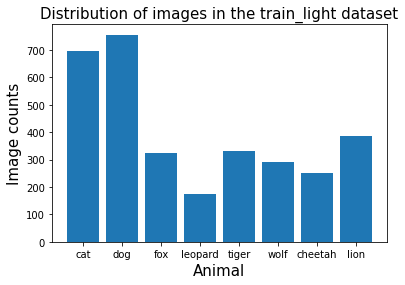

In [45]:
animals_train, cout_train = load_animals('train_light')
visualize_animal(cout_train, 'train_light')

In [46]:
cout_train

,animal,train_light
0,cat,695
1,dog,756
2,fox,326
3,leopard,173
4,tiger,330
5,wolf,291
6,cheetah,252
7,lion,385


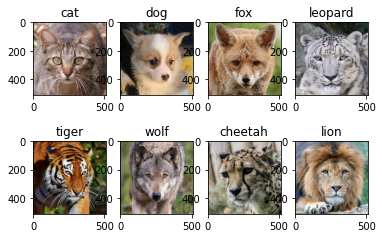

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4)
for i in range(len(animals_train)):
    axs[i//4][i%4].imshow(animals_train[i][9])
    axs[i//4][i%4].set_title(cout_train['animal'][i])
plt.show()

In [48]:
 X_train, y_train = transform(animals_train)

0
1
2
3
4
5
6
7


Loading val_light dataset...
Found directory: data/val_light/cat
Found directory: data/val_light/dog
Found directory: data/val_light/fox
Found directory: data/val_light/leopard
Found directory: data/val_light/tiger
Found directory: data/val_light/wolf
Found directory: data/val_light/cheetah
Found directory: data/val_light/lion
Found directory: data/val_light
Animal with maximum number of pictures: dog, the number of pictures is: 165
Animal with minimum number of pictures: fox, the number of pictures is: 45


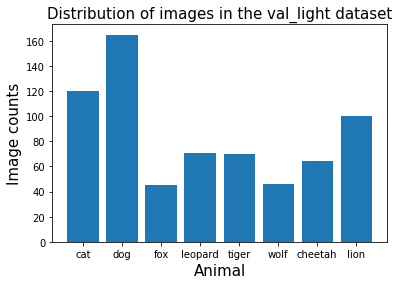

In [49]:
animals_val, cout_val = load_animals('val_light')
visualize_animal(cout_val, 'val_light')

In [50]:
 X_val, y_val = transform(animals_val)

0
1
2
3
4
5
6
7


In [51]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699
0,0.129412,0.247059,0.000131,0.129412,0.247059,0.003922,0.125621,0.247059,0.003922,0.125490,...,0.031503,0.200000,0.317647,0.047190,0.160797,0.294118,0.027451,0.164575,0.305882,0.023786
1,0.364571,0.392022,0.430985,0.396353,0.420261,0.459085,0.622353,0.633355,0.645098,0.704214,...,0.537224,0.686928,0.643028,0.552832,0.425882,0.398039,0.331373,0.121961,0.114118,0.094510
2,0.611765,0.615686,0.631242,0.611634,0.611255,0.603412,0.619499,0.607712,0.592157,0.623529,...,0.548004,0.666667,0.623529,0.545752,0.639216,0.576863,0.471373,0.627451,0.537381,0.411638
3,0.556466,0.419216,0.325094,0.561176,0.423922,0.318039,0.743377,0.592963,0.507190,0.902614,...,0.027451,0.058061,0.042375,0.039216,0.163529,0.101307,0.070065,0.250458,0.152806,0.101699
4,0.129416,0.129416,0.121573,0.137255,0.137255,0.129412,0.145098,0.141307,0.133464,0.137255,...,0.481438,0.365490,0.342614,0.323007,0.220392,0.200784,0.180784,0.145359,0.133464,0.121569


In [52]:
cout_val

,animal,val_light
0,cat,120
1,dog,165
2,fox,45
3,leopard,71
4,tiger,70
5,wolf,46
6,cheetah,64
7,lion,100


In [53]:
width, length, _ = animals_train[0][0].shape
min(width, length)

512

In [ ]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

/Users/jinghan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
import seaborn as sn
df_cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
# save the model
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
def data_process(path, plot=False):
    img = imread(path)
    
    if plot:
        plt.imshow(img)
        plt.show()
    
    # construct x
    X = resize(img,(30,30,3)).flatten()
    X = X.reshape(1,len(X))
    return X
                  
# load the model
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
test = data_process(r'data/cat.jpg', True)
print(loaded_model.predict(test))
loaded_model.predict_proba(test)